In [234]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import platform
# 정규식
import re

In [235]:
df = pd.read_csv('usage_by_weather2.csv')
df.drop(columns = ['Unnamed: 0'])

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,wh,kwh
0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,49968118.15,11154070.87
1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,43576388.06,10820313.94
2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,783288,44345831.21,10577876.27
3,2021,1,4,1.2,3.1,0.0,71.8,10.07,783288,49666971.53,11410542.58
4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,783310,44114435.78,11097614.74
...,...,...,...,...,...,...,...,...,...,...,...
725,2022,12,27,0.3,1.8,0.0,74.1,13.08,800308,31743683.54,9442942.40
726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,802036,32641190.23,9679363.18
727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,58820056.15,11754265.48
728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,52733978.57,12149583.10


In [236]:
df

,Unnamed: 0,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,wh,kwh
0,0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,49968118.15,11154070.87
1,1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,43576388.06,10820313.94
2,2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,783288,44345831.21,10577876.27
3,3,2021,1,4,1.2,3.1,0.0,71.8,10.07,783288,49666971.53,11410542.58
4,4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,783310,44114435.78,11097614.74
...,...,...,...,...,...,...,...,...,...,...,...,...
725,725,2022,12,27,0.3,1.8,0.0,74.1,13.08,800308,31743683.54,9442942.40
726,726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,802036,32641190.23,9679363.18
727,727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,58820056.15,11754265.48
728,728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,52733978.57,12149583.10


In [237]:
# 결측치 유무 확인
df.isnull().sum()

Unnamed: 0        0
year              0
month             0
day               0
temp              0
cloud             0
rainfall_total    0
Humidity_mean     0
solar             0
customer          0
wh                0
kwh               0
dtype: int64

In [241]:
df = df.drop(columns = ['Unnamed: 0'])
df.columns

KeyError: "['Unnamed: 0'] not found in axis"

In [245]:
df

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,wh,kwh
0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,49968118.15,11154070.87
1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,43576388.06,10820313.94
2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,783288,44345831.21,10577876.27
3,2021,1,4,1.2,3.1,0.0,71.8,10.07,783288,49666971.53,11410542.58
4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,783310,44114435.78,11097614.74
...,...,...,...,...,...,...,...,...,...,...,...
725,2022,12,27,0.3,1.8,0.0,74.1,13.08,800308,31743683.54,9442942.40
726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,802036,32641190.23,9679363.18
727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,58820056.15,11754265.48
728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,52733978.57,12149583.10


## 1. matplotlib 산점도

In [246]:
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)
    plt.rcParams['axes.unicode_minus'] = False

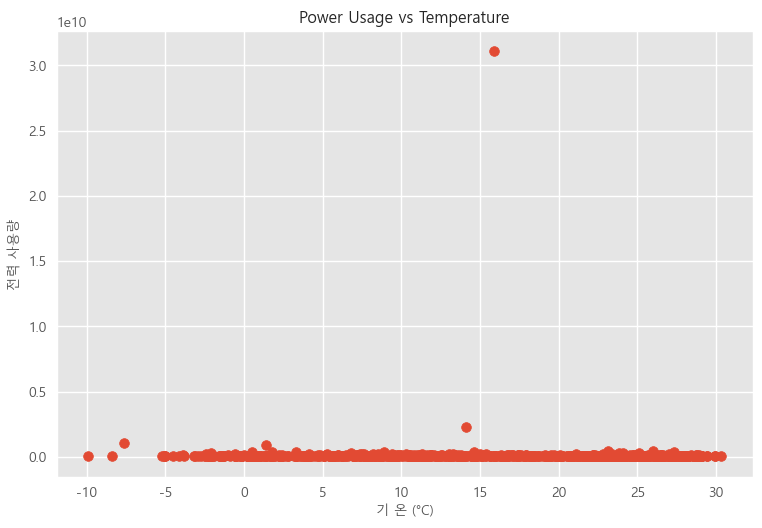

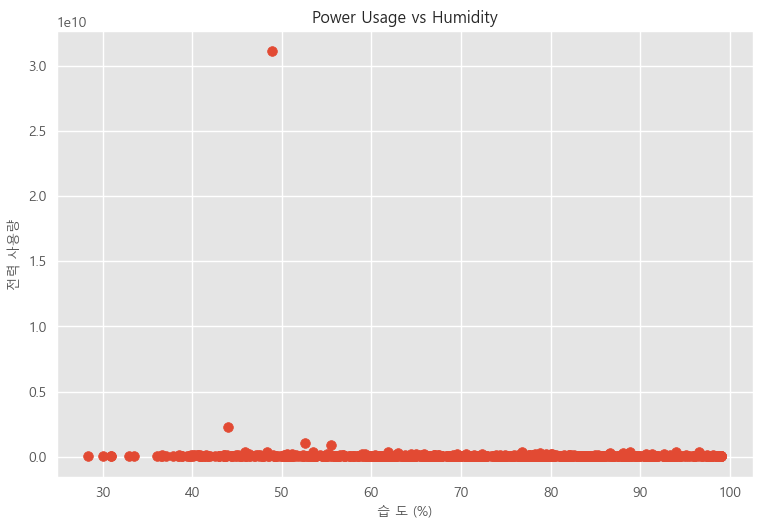

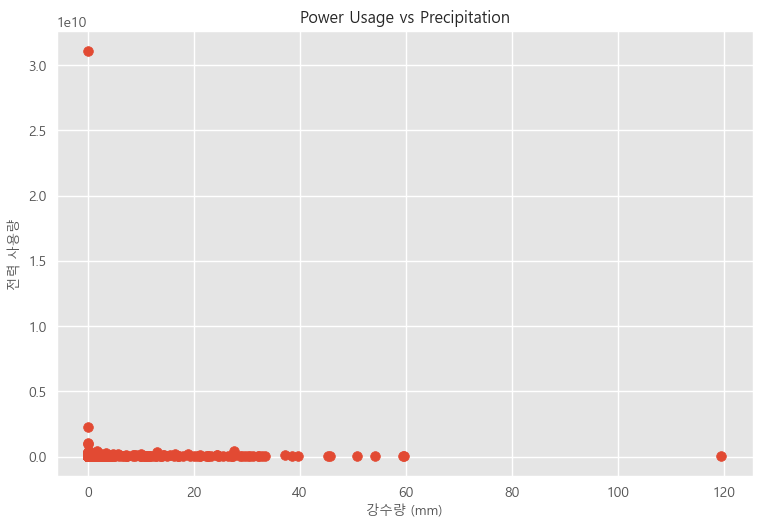

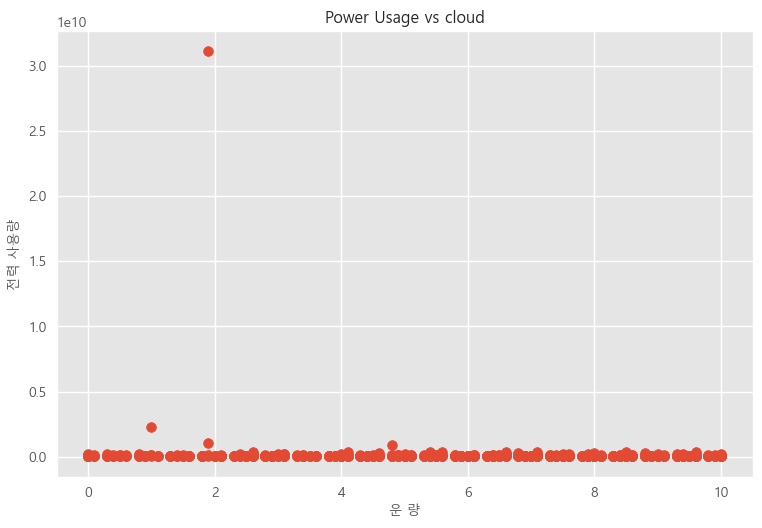

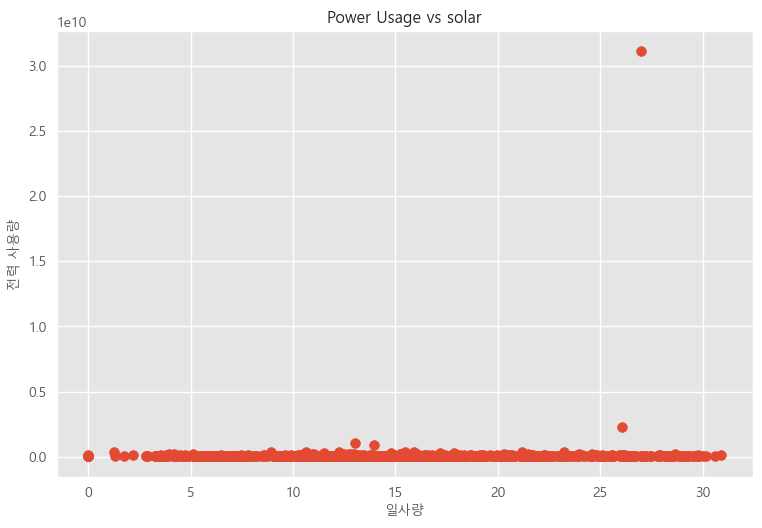

In [251]:
# 기온, 사용량
plt.scatter(df['temp'], df['wh'])  # 온도와 전력 사용량의 산점도를 그린다.
plt.xlabel('기 온 (°C)')  # x축 라벨을 설정한다.
plt.ylabel('전력 사용량')  # y축 라벨을 설정한다.
plt.title('Power Usage vs Temperature')  # 그래프 제목을 설정한다.
# 빈 그래프를 그린다.
# plt.plot(list(np.round(np.linspace(1076574227.21, 99991210.32))))
plt.show()  # 그래프를 출력한다.

# 습도, 사용량
plt.scatter(df['Humidity_mean'], df['wh'])
plt.xlabel('습 도 (%)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Humidity')
plt.show()

# 강수량, 사용량
plt.scatter(df['rainfall_total'], df['wh'])
plt.xlabel('강수량 (mm)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Precipitation')
plt.show()

# 운량, 사용량
plt.scatter(df['cloud'], df['wh'])
plt.xlabel('운 량')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs cloud')
plt.show()

# 일사량, 사용량
plt.scatter(df['solar'], df['wh'])
plt.xlabel('일사량')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs solar')
plt.show()

# x,y값 범위 찾아서 linsplace 으로 y값 지정

TypeError: can't multiply sequence by non-int of type 'float'

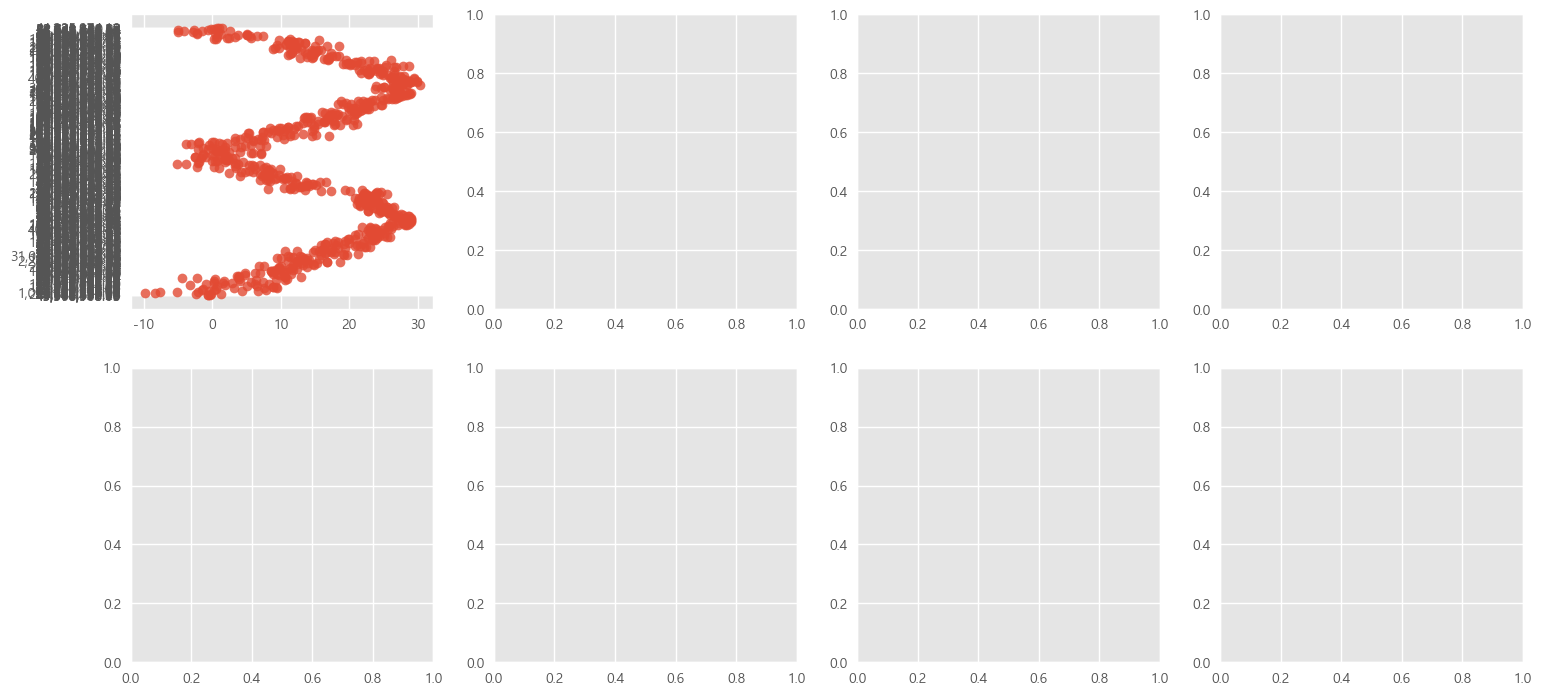

In [ ]:
weather_df = ['temp', 'cloud',
              'rainfall_total', 'Humidity_mean', 'solar']
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)  # 4열 2행의 subplot 생성
for i, feature in enumerate(weather_df):  # weather_df의 각 feature에 대해 반복문 실행
    row = int(i/4)  # subplot의 행 위치 계산
    col = i % 4  # subplot의 열 위치 계산
    # x축 feature와 y축 'wh'를 이용해 regplot 생성, subplot 위치는 axs[row][col]
    sns.regplot(x=feature, y='wh', data=df, ax=axs[row][col])

In [ ]:
df.columns

Index(['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'customer', 'demand_max(Wh)', 'usage(kWh)'],
      dtype='object')

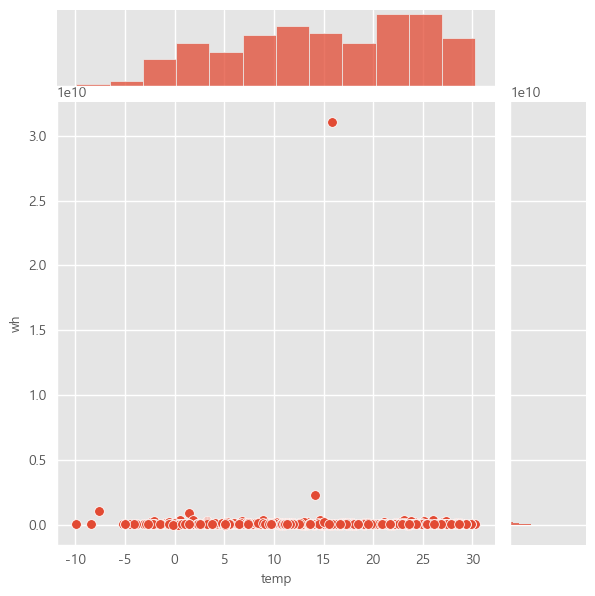

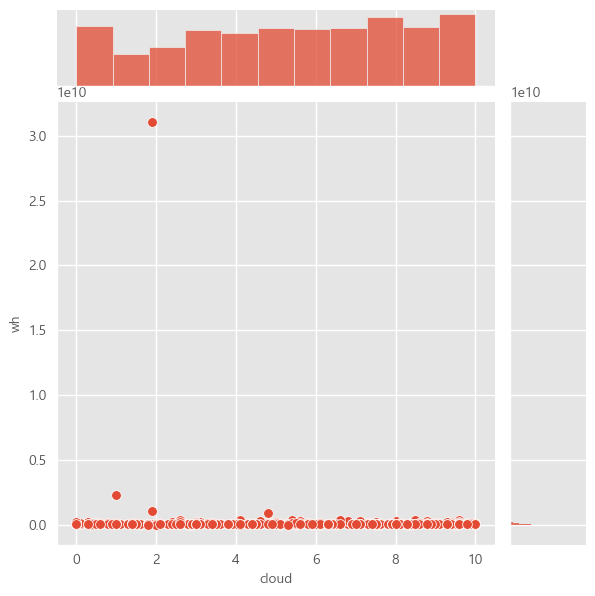

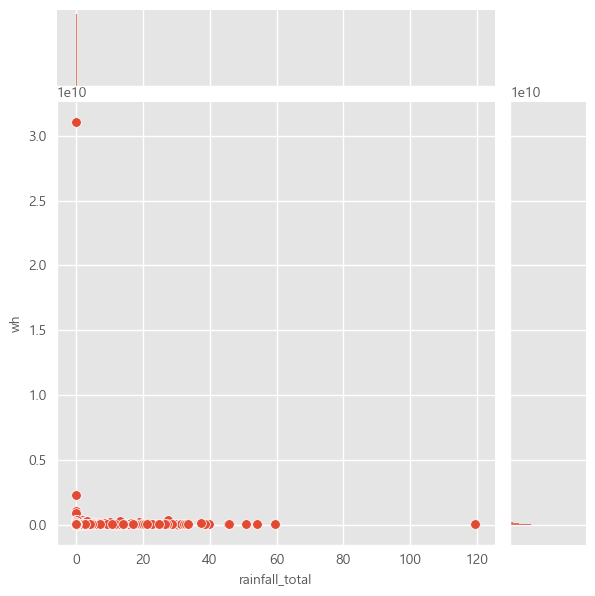

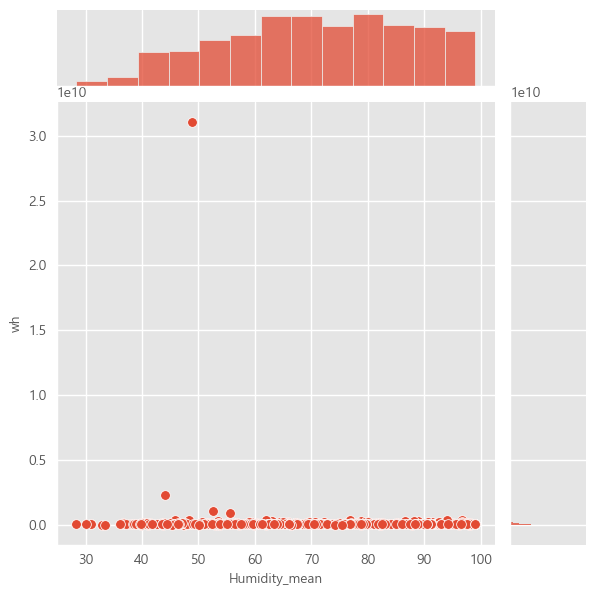

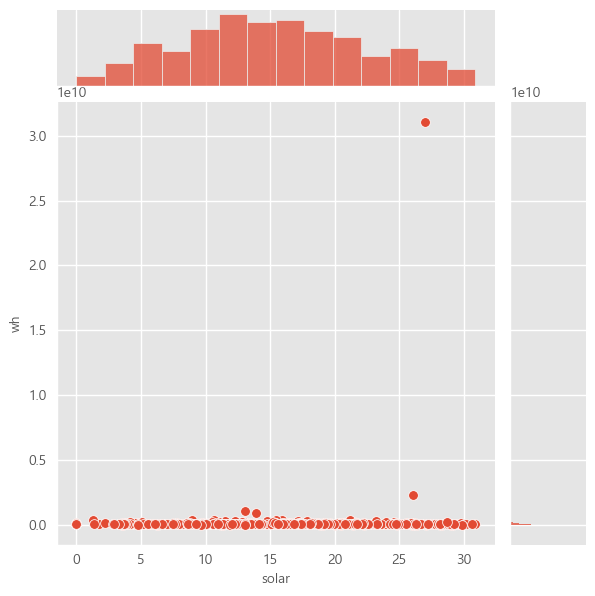

In [249]:
weather_df = ['temp', 'cloud',
              'rainfall_total', 'Humidity_mean', 'solar']
for feature in weather_df:
    sns.jointplot(x = feature, y = 'wh', data = df)

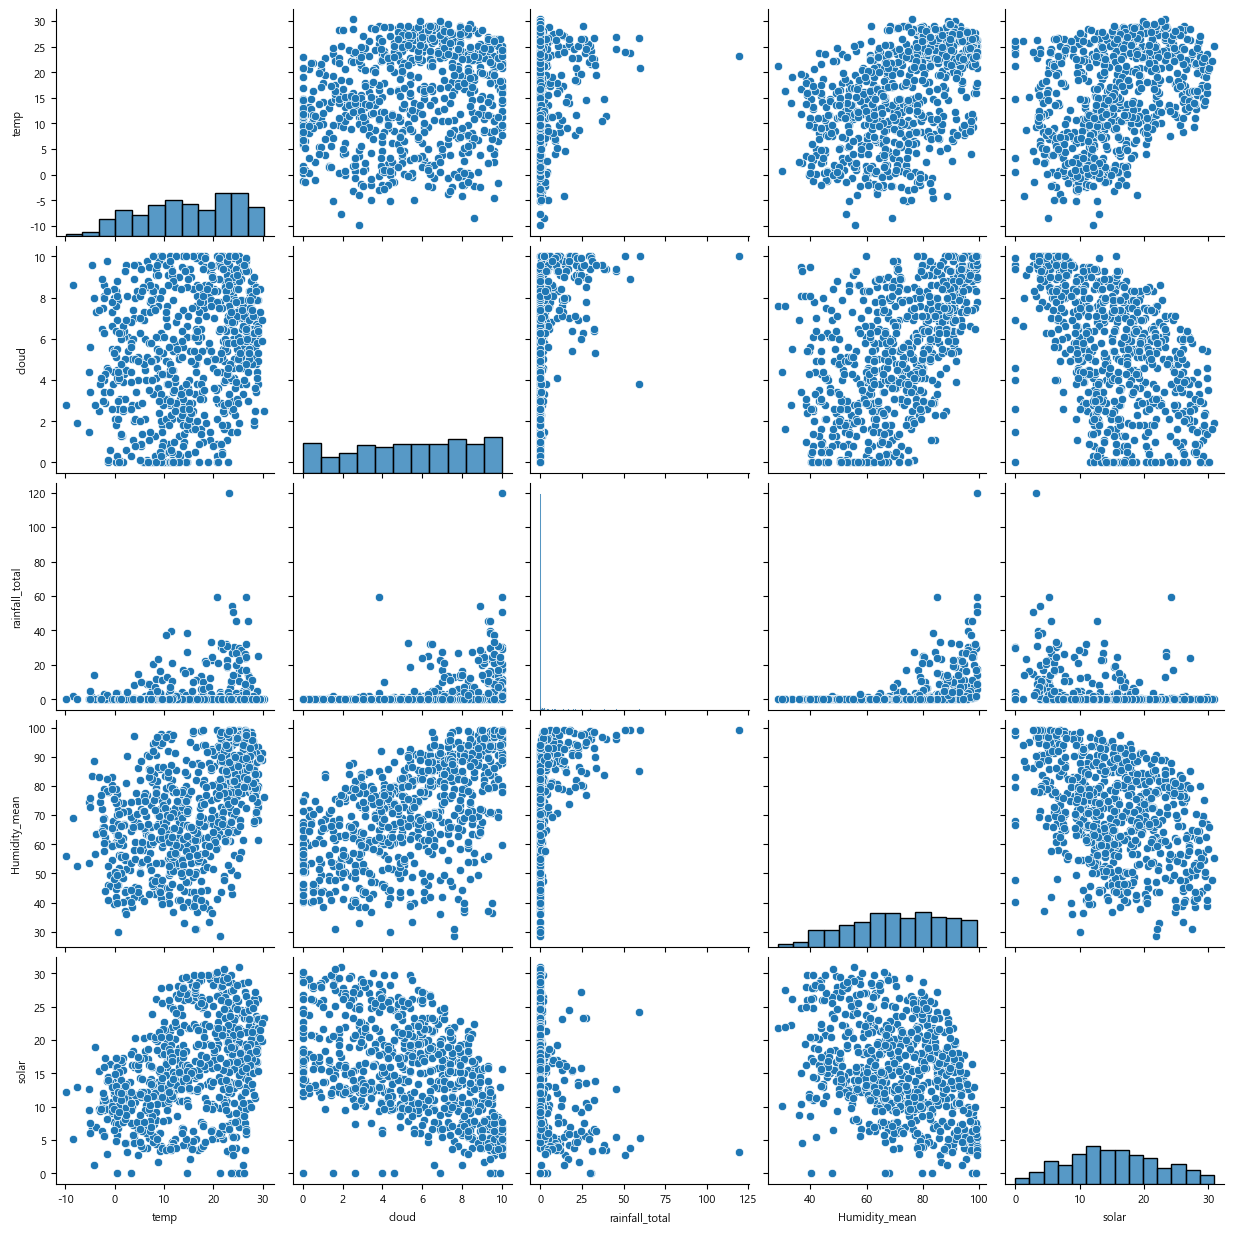

In [ ]:
sns.pairplot(df, vars=['temp', 'cloud',
              'rainfall_total', 'Humidity_mean', 'solar'])

In [ ]:
weather_df = ['temp', 'cloud',
              'rainfall_total', 'Humidity_mean', 'solar']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량',
             'temp' : '기온'}

for feature in weather_df:
       # Scatter plot 생성
       scatter = go.Scatter(x=df['temp'], y=df['wh'], mode='markers', 
                            marker=dict(size=df['Humidity_mean'],
                                   color=df[feature], colorscale='Viridis'))

       # 레이아웃 생성
       layout = go.Layout(title='날씨와 전력량에 따른 관계    원크기 : 습도     색상 : ' + col_label[feature],
                          xaxis={'title': '기온'}, 
                            yaxis={'title': '전력량'}, hovermode='closest')

       # 그래프 생성
       fig = go.Figure(data=[scatter], layout=layout)

       # 그래프 출력
       fig.show()

In [ ]:
df.columns

Index(['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'customer', 'demand_max(Wh)', 'usage(kWh)'],
      dtype='object')

In [ ]:
weather_df = ['temp', 'cloud', 'rainfall_total',
              'Humidity_mean', 'solar']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량',
            }

for feature in weather_df:
    fig = px.scatter(df,
                    x="temp",
                    y="demand_max('wh')",
                    title='날씨와 전력량에 따른 관계',
                    template='plotly_dark',
                    color=feature,
                    color_continuous_scale=["'wh'ite", "red"],
                    labels={'temp': '기온', "demand_max('wh')": '전력량', feature: col_label[feature]})
    fig.show()

SyntaxError: positional argument follows keyword argument (1101200908.py, line 18)

In [ ]:
df

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,demand_max(Wh),usage(kWh)
0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,"49,968,118.15","11,154,070.87"
1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,"43,576,388.06","10,820,313.94"
2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,783288,"44,345,831.21","10,577,876.27"
3,2021,1,4,1.2,3.1,0.0,71.8,10.07,783288,"49,666,971.53","11,410,542.58"
4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,783310,"44,114,435.78","11,097,614.74"
...,...,...,...,...,...,...,...,...,...,...,...
725,2022,12,27,0.3,1.8,0.0,74.1,13.08,800308,"31,743,683.54","9,442,942.40"
726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,802036,"32,641,190.23","9,679,363.18"
727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,"58,820,056.15","11,754,265.48"
728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,"52,733,978.57","12,149,583.10"


In [ ]:
weather_df = ['temp', 'cloud',
              'rainfall_total', 'Humidity_mean', 'solar']
col_label = {'temp' : '기온',
             'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량'}

for feature in weather_df:
    # Box plot 생성
    box = go.Box(x=df[feature], y=df["demand_max('wh')"], boxpoints='all')

    # 레이아웃 생성
    layout = go.Layout(title='날씨와 전력량에 따른 관계', xaxis={'title': col_label[feature]}, 
                    yaxis={'title': '전력량(kw)'},
                    template='plotly_dark')

    # 그래프 생성
    fig = go.Figure(data=[box], layout=layout)

    # 그래프 출력
    fig.show()

In [ ]:
weather_df = ['Humidity_mean','rainfall_total', 'cloud', 'solar', 'snow']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량',
             'snow' : '적설량'}

for feature in weather_df:
    # Heatmap 생성
    heatmap = go.Heatmap(x=df['temp'], y=df['wh'], z=df[feature])

    # 레이아웃 생성
    layout = go.Layout(title='날씨와 전력량 데이터                  색 : ' + col_label[feature],
                       xaxis={'title': '기온'}, yaxis={'title': '전력량(kw)'})

    # 그래프 생성
    fig = go.Figure(data=[heatmap], layout=layout)

    # 그래프 출력
    fig.show()

KeyError: 'snow'

Text(0.5, 1.0, '날씨와 전력량 데이터')

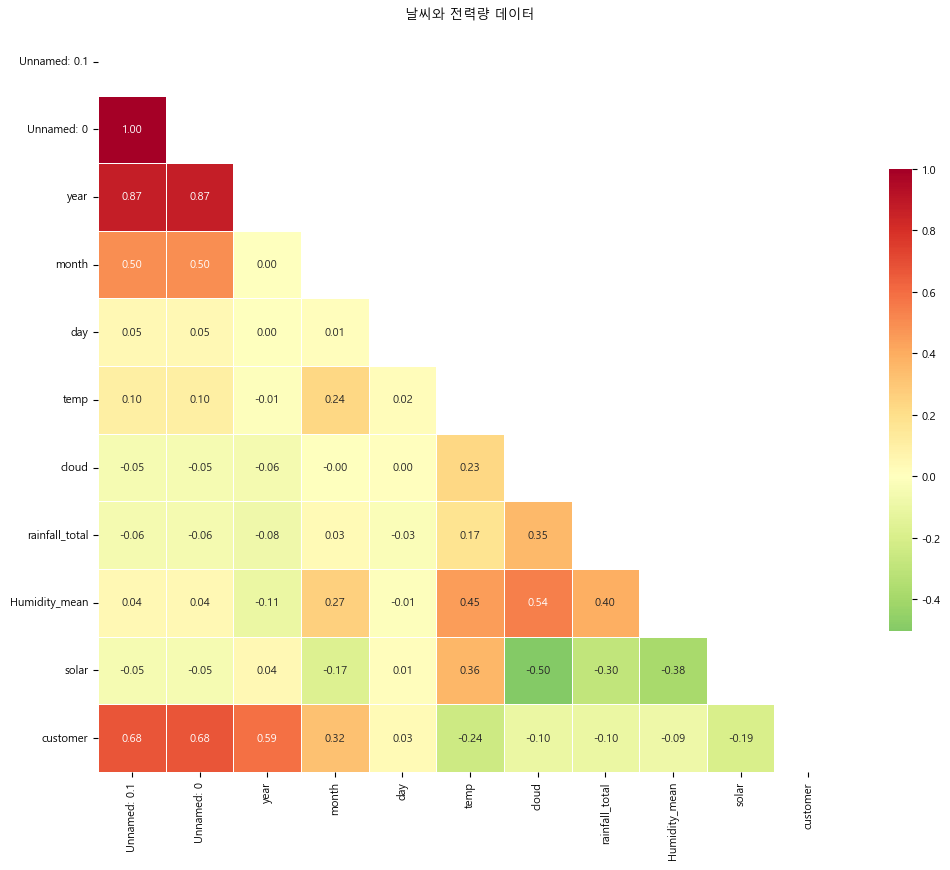

In [ ]:
# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = df.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(kw_matrix, dtype='bool')
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(kw_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask,
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("날씨와 전력량 데이터")

In [ ]:
weather_df = ['Humidity_mean','rainfall_total', 'cloud', 'solar', 'snow']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량',
             'snow' : '적설량'}

for feature in weather_df:
    # Line plot 생성
    line_plot = px.line(df, x='temp', y='usage', color=feature, 
                        title='날씨와 전력량 데이터', 
                        labels={'temp': '기온', 'usage': '전력량', feature: col_label[feature]})

# 그래프 출력
line_plot.show()

In [ ]:
df.columns
df.drop(columns = [])

Index(['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'customer', 'demand_max(Wh)', 'usage(kWh)'],
      dtype='object')

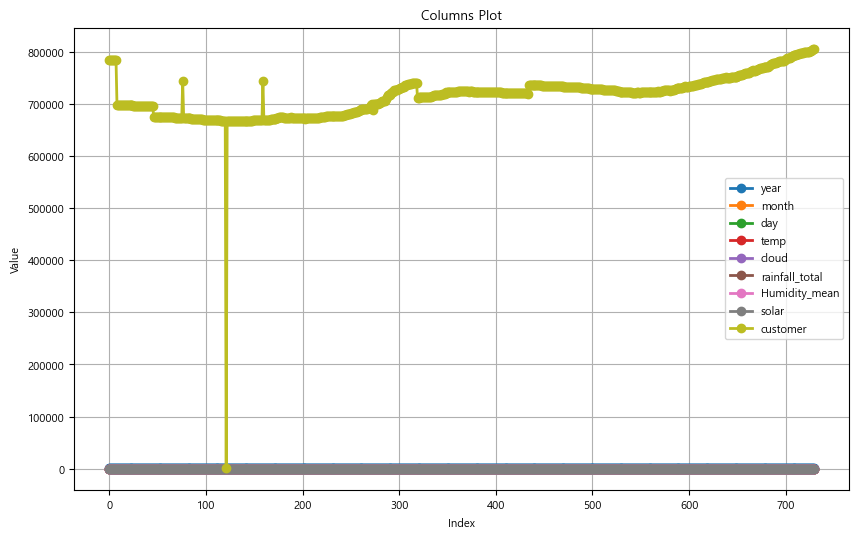

In [ ]:
data = df

df = pd.DataFrame(data)

def plot_columns(df):
    ax = df.plot(figsize=(10, 6), marker='o', linestyle='-', lw=2)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Columns Plot')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

plot_columns(df)


In [ ]:
df['wh'].max()

'99,991,210.32'

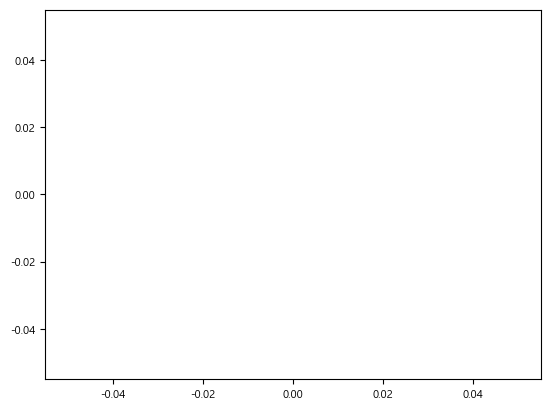

In [ ]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

def g(t):
    return np.sin(np.pi*t)

t1 = np.arange(1076574227.21, 99991210.32, 100000)
t2 = np.arange(1076574227.21, 99991210.32, 100000)

plt.plot(t1, f(t1), t2, g(t2), 'r-')

plt.show()

In [ ]:
df_test = df
df_test
# df_test['demand_max('wh')1'] = df['wh'].replace(',', '')
# df_test

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,demand_max(Wh),usage(kWh)
0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,"49,968,118.15","11,154,070.87"
1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,"43,576,388.06","10,820,313.94"
2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,783288,"44,345,831.21","10,577,876.27"
3,2021,1,4,1.2,3.1,0.0,71.8,10.07,783288,"49,666,971.53","11,410,542.58"
4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,783310,"44,114,435.78","11,097,614.74"
...,...,...,...,...,...,...,...,...,...,...,...
725,2022,12,27,0.3,1.8,0.0,74.1,13.08,800308,"31,743,683.54","9,442,942.40"
726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,802036,"32,641,190.23","9,679,363.18"
727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,"58,820,056.15","11,754,265.48"
728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,"52,733,978.57","12,149,583.10"


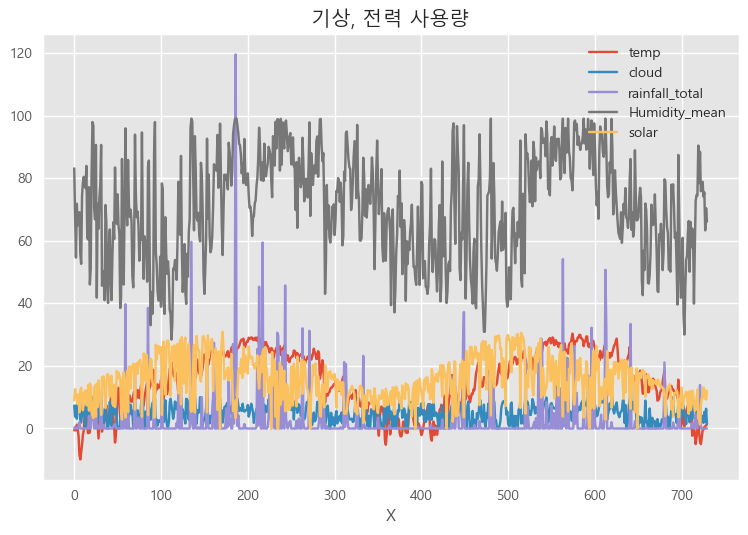

In [252]:
# Assuming you have a DataFrame called 'data_frame'
# Replace 'column_1', 'column_2', and 'column_3' with the names of your columns
columns = ['temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', ]

# Set the style for the plot
plt.style.use('ggplot')

# Create the line graph with different colors for each column
for column in columns:
    plt.plot(df[column], label=column)

# Set labels for the x and y axes
plt.xlabel('X')
# plt.yticks(range(99991210,1076574227,60000000), rotation = 90)
# plt.xticks(range(10000000,1076574227,100000), rotation = 90)
# plt.ylabel('사용량', rotation = 90)
plt.ylabel('')

# Add a legend
plt.legend()

# Set a title for the graph
plt.title('기상, 전력 사용량')

# Show the graph
plt.show()


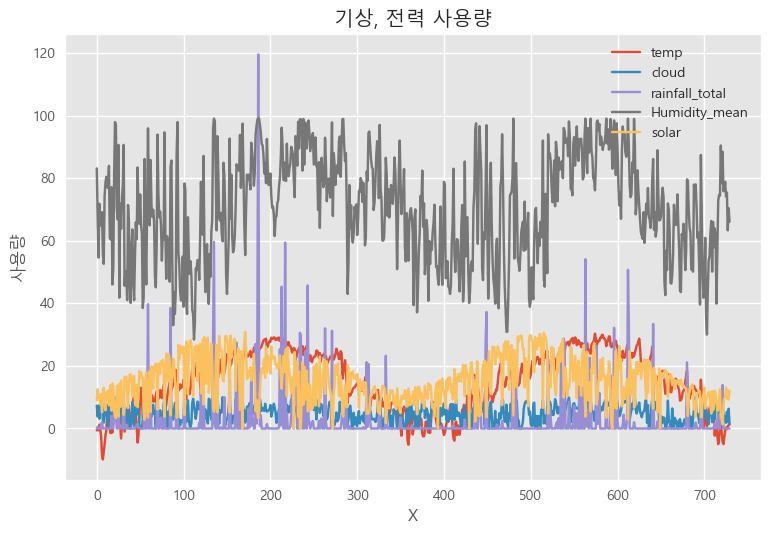

In [254]:
# Assuming you have a DataFrame called 'data_frame'
# Replace 'column_1', 'column_2', and 'column_3' with the names of your columns
columns = ['temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar']

# Set the style for the plot
plt.style.use('ggplot')

# Create the line graph with different colors for each column
for column in columns:
    plt.plot(df[column], label=column)

# Set labels for the x and y axes
plt.xlabel('X')
# plt.yticks(range(99991210,1076574227,60000000), rotation = 90)
# plt.xticks(range(10000000,1076574227,100000), rotation = 90)
# plt.ylabel('사용량', rotation = 90)
plt.ylabel('사용량')

# Add a legend
plt.legend()

# Set a title for the graph
plt.title('기상, 전력 사용량')

# Show the graph
plt.show()


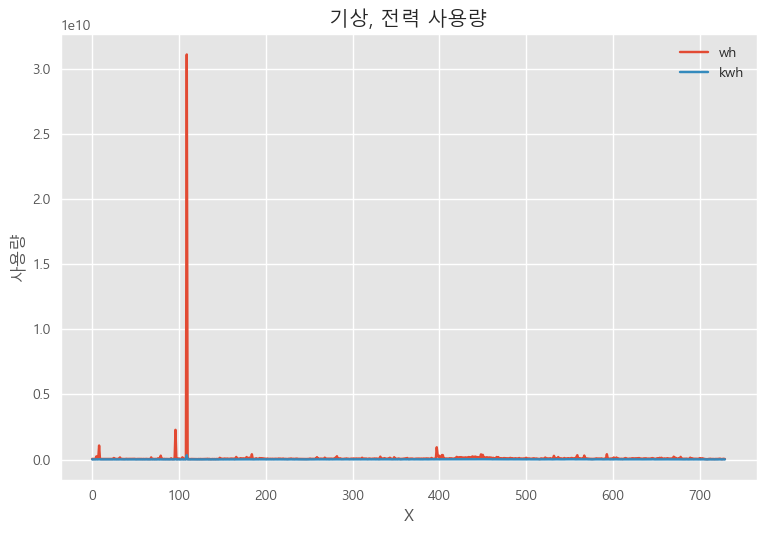

In [256]:
# Assuming you have a DataFrame called 'data_frame'
# Replace 'column_1', 'column_2', and 'column_3' with the names of your columns
columns = ['wh', 'kwh']

# Set the style for the plot
plt.style.use('ggplot')

# Create the line graph with different colors for each column
for column in columns:
    plt.plot(df[column], label=column)

# Set labels for the x and y axes
plt.xlabel('X')
# plt.yticks(range(99991210,1076574227,60000000), rotation = 90)
# plt.xticks(range(10000000,1076574227,100000), rotation = 90)
# plt.ylabel('사용량', rotation = 90)
plt.ylabel('사용량')

# Add a legend
plt.legend()

# Set a title for the graph
plt.title('기상, 전력 사용량')

# Show the graph
plt.show()


In [281]:
data = pd.read_csv('weather_kw_df.csv')
# pd.read_excel

In [282]:
# data['year'] >= 2020
data20_22 = data[data['year'] >= 2020]
data20_22

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,kw
336,2020,1,가로등,4.6,68,74.9,6.3,264.36,0.0,8102224
337,2020,1,교육용,4.6,68,74.9,6.3,264.36,0.0,29304976
338,2020,1,농사용,4.6,68,74.9,6.3,264.36,0.0,10033014
339,2020,1,산업용,4.6,68,74.9,6.3,264.36,0.0,242265471
340,2020,1,심 야,4.6,68,74.9,6.3,264.36,0.0,13428036
...,...,...,...,...,...,...,...,...,...,...
583,2022,12,농사용,1.1,63,30.6,5.0,275.78,32.9,8624110
584,2022,12,산업용,1.1,63,30.6,5.0,275.78,32.9,256259483
585,2022,12,심 야,1.1,63,30.6,5.0,275.78,32.9,8466299
586,2022,12,일반용,1.1,63,30.6,5.0,275.78,32.9,251968761


In [283]:
data20_22.head(9)

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,kw
336,2020,1,가로등,4.6,68,74.9,6.3,264.36,0.0,8102224
337,2020,1,교육용,4.6,68,74.9,6.3,264.36,0.0,29304976
338,2020,1,농사용,4.6,68,74.9,6.3,264.36,0.0,10033014
339,2020,1,산업용,4.6,68,74.9,6.3,264.36,0.0,242265471
340,2020,1,심 야,4.6,68,74.9,6.3,264.36,0.0,13428036
341,2020,1,일반용,4.6,68,74.9,6.3,264.36,0.0,269323437
342,2020,1,주택용,4.6,68,74.9,6.3,264.36,0.0,184074539
343,2020,2,가로등,5.3,67,47.8,4.9,346.78,10.9,7797033
344,2020,2,교육용,5.3,67,47.8,4.9,346.78,10.9,23584697


가로등 : 1
교육용 : 2
농사용 : 3
산업용 : 4
심 야  : 5
일반용 : 6
주택용 : 7

In [306]:
data20_22_1 = data20_22[data20_22['type'] == '가로등']
data20_22_2 = data20_22[data20_22['type'] == '교육용']
data20_22_3 = data20_22[data20_22['type'] == '농사용']
data20_22_4 = data20_22[data20_22['type'] == '산업용']
data20_22_5 = data20_22[data20_22['type'] == '심 야']
data20_22_6 = data20_22[data20_22['type'] == '일반용']
data20_22_7 = data20_22[data20_22['type'] == '주택용']

가로등 : 1
교육용 : 2
농사용 : 3
산업용 : 4
심 야  : 5
일반용 : 6
주택용 : 7

In [287]:
data20_22_1['kw'].sum()
data20_22_2['kw'].sum()
data20_22_3['kw'].sum()
data20_22_4['kw'].sum()
data20_22_5['kw'].sum()
data20_22_6['kw'].sum()
data20_22_7['kw'].sum()

238780818

In [309]:
data20_22_4['kw'].sum()

9279825724

In [314]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# 1행 2열의 subplot 생성
subfig = make_subplots(
    rows=1, cols=2,
    column_widths=[10, 10],
    row_heights=[10],
    subplot_titles=("전력 사용량 비율", "용도별 총 사용량"),
    specs=[[{"type": "pie"}, {"type": "bar"}]])

# 데이터 그룹화 후 전력 사용량 비율을 파이 차트로 생성하여 subplot에 추가
gwangju_gu = data20_22.groupby('type')['kw'].sum().sort_values(ascending=False)
subfig.add_trace(
    go.Pie(labels=gwangju_gu.index, values=gwangju_gu.values, showlegend=True), 1, 1)

# 데이터 그룹화 후 용도별 총 사용량을 막대 그래프로 생성하여 subplot에 추가
subfig.add_trace(
    go.Bar(x=gwangju_gu.index, y=gwangju_gu.values, showlegend=False), 1, 2)

# subplot 레이아웃 설정
subfig.update_layout(template="plotly_white", title='전력 사용량')

# subplot 출력
subfig.show()


In [315]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Create a subplot with 1 row and 2 columns
subfig = make_subplots(
    rows=1, cols=2,
    column_widths=[10, 10],
    row_heights=[10],
    subplot_titles=("Percentage of power usage", "Total usage by usage"),
    specs=[[{"type": "pie"}, {"type": "bar"}]])

# After grouping the data, create a pie chart of the power usage percentage and add it to the subplot
gwangju_gu = data20_22.groupby('type')['kw'].sum().sort_values(ascending=False)
subfig.add_trace(
    go.Pie(labels=gwangju_gu.index, values=gwangju_gu.values, showlegend=True), 1, 1)

# Define a list of colors for the bar graph
colors = ['blue', 'orange', 'green', 'red']

# After grouping the data, create a bar graph of the total usage by purpose and add it to the subplot
subfig.add_trace(
    go.Bar(x=gwangju_gu.index, y=gwangju_gu.values, showlegend=False, marker=dict(color=colors)), 1, 2)

# set subplot layout
subfig.update_layout(template="plotly_white", title='power usage')

# subplot output
subfig.show()


In [327]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd


color_map = {'산업용': 'blue', '일반용': 'orange', '주택용': 'green',
             '교육용': 'red', '농사용': 'yellow', '심 야': 'purple', '가로등': 'teal'}


subfig = make_subplots(
    rows=1, cols=2,
    column_widths=[10, 10],
    row_heights=[10],
    subplot_titles=("용도별 전력 사용량", "전체 전력 사용량"),
    specs=[[{"type": "pie"}, {"type": "bar"}]])

# 데이터를 그룹화한 후, 전력 사용량 비율의 파이 차트를 생성하고 서브플롯에 추가
gwangju_gu = data20_22.groupby('type')['kw'].sum().sort_values(ascending=False)
subfig.add_trace(
    go.Pie(labels=gwangju_gu.index, values=gwangju_gu.values, showlegend=True, marker=dict(colors=[color_map[t] for t in gwangju_gu.index])), 1, 1)

# 데이터를 그룹화한 후, 용도별 총 사용량의 막대 그래프를 생성하고 서브플롯에 추가
subfig.add_trace(
    go.Bar(x=gwangju_gu.index, y=gwangju_gu.values, showlegend=False, marker=dict(color=[color_map[t] for t in gwangju_gu.index])), 1, 2)

# 서브플롯 레이아웃을 설정
subfig.update_layout(template="plotly_white", title='2020 ~ 2022 전력 사용량')

# 서브플롯 출력
subfig.show()


In [342]:
df = pd.read_csv('weather_kw_df.csv')
df.rename(columns= {"kw":"usage"}, inplace=True)

def type_change(type):
    if type == "일반용":
        return 1
    elif type == '주택용':
        return 2
    elif type == '가로등':
        return 3
    elif type == '교육용':
        return 4
    elif type == '농사용':
        return 5
    elif type == '산업용':
        return 6
    elif type == '심 야':
        return 7  
    
df['type'] = df['type'].apply(lambda x: type_change(x))
df.sort_values(by=['year', 'month', 'type'], inplace=True)
df

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,usage
5,2016,1,1,0.9,69,49.7,6.0,244.83,13.5,255851378
6,2016,1,2,0.9,69,49.7,6.0,244.83,13.5,173309722
0,2016,1,3,0.9,69,49.7,6.0,244.83,13.5,7842078
1,2016,1,4,0.9,69,49.7,6.0,244.83,13.5,27092538
2,2016,1,5,0.9,69,49.7,6.0,244.83,13.5,9785066
...,...,...,...,...,...,...,...,...,...,...
581,2022,12,3,1.1,63,30.6,5.0,275.78,32.9,7316937
582,2022,12,4,1.1,63,30.6,5.0,275.78,32.9,31159967
583,2022,12,5,1.1,63,30.6,5.0,275.78,32.9,8624110
584,2022,12,6,1.1,63,30.6,5.0,275.78,32.9,256259483


In [343]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


color_map = {'6': 'blue', '1': 'orange', '2': 'green',
             '4': 'red', '5': 'yellow', '7': 'purple', '3': 'teal'}


subfig = make_subplots(
    rows=1, cols=2,
    column_widths=[10, 10],
    row_heights=[10],
    subplot_titles=("용도별 전력 사용량", "전체 전력 사용량"),
    specs=[[{"type": "pie"}, {"type": "bar"}]])

# 데이터를 그룹, 파이 그래프 생성
gwangju_gu = df.groupby('type')['usage'].sum().sort_values(ascending=False)
subfig.add_trace(
    go.Pie(labels=gwangju_gu.index, values=gwangju_gu.values, showlegend=True, marker=dict(colors=[color_map[t] for t in gwangju_gu.index])), 1, 1)

# 데이터를 그룹화, 막대 그래프
subfig.add_trace(
    go.Bar(x=gwangju_gu.index, y=gwangju_gu.values, showlegend=False, marker=dict(color=[color_map[t] for t in gwangju_gu.index])), 1, 2)

# 서브플롯 레이아웃을 설정
subfig.update_layout(template="plotly_white", title='2020 ~ 2022 전력 사용량')

# 서브플롯 출력
subfig.show()

KeyError: 6

In [344]:
df = pd.read_csv('weather_kw_df.csv')
df.rename(columns= {"kw":"usage"}, inplace=True)

df.head()

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,usage
0,2016,1,가로등,0.9,69,49.7,6.0,244.83,13.5,7842078
1,2016,1,교육용,0.9,69,49.7,6.0,244.83,13.5,27092538
2,2016,1,농사용,0.9,69,49.7,6.0,244.83,13.5,9785066
3,2016,1,산업용,0.9,69,49.7,6.0,244.83,13.5,261196271
4,2016,1,심 야,0.9,69,49.7,6.0,244.83,13.5,18357075


In [345]:
def type_change(type):
    if type == "일반용":
        return 1
    elif type == '주택용':
        return 2
    elif type == '가로등':
        return 3
    elif type == '교육용':
        return 4
    elif type == '농사용':
        return 5
    elif type == '산업용':
        return 6
    elif type == '심 야':
        return 7  

In [346]:
df['type'] = df['type'].apply(lambda x: type_change(x))

In [347]:
df.sort_values(by=['year', 'month', 'type'], inplace=True)
df

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,usage
5,2016,1,1,0.9,69,49.7,6.0,244.83,13.5,255851378
6,2016,1,2,0.9,69,49.7,6.0,244.83,13.5,173309722
0,2016,1,3,0.9,69,49.7,6.0,244.83,13.5,7842078
1,2016,1,4,0.9,69,49.7,6.0,244.83,13.5,27092538
2,2016,1,5,0.9,69,49.7,6.0,244.83,13.5,9785066
...,...,...,...,...,...,...,...,...,...,...
581,2022,12,3,1.1,63,30.6,5.0,275.78,32.9,7316937
582,2022,12,4,1.1,63,30.6,5.0,275.78,32.9,31159967
583,2022,12,5,1.1,63,30.6,5.0,275.78,32.9,8624110
584,2022,12,6,1.1,63,30.6,5.0,275.78,32.9,256259483


In [356]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import plotly.express as px

color_map = {6: px.colors.sequential.Viridis[0], 
             1: px.colors.sequential.Viridis[2], 
             2: px.colors.sequential.Viridis[4], 
             4: px.colors.sequential.Viridis[6], 
             5: px.colors.sequential.Viridis[8], 
             7: px.colors.sequential.Viridis[9], 
             3: px.colors.sequential.Viridis[1]}



subfig = make_subplots(
    rows=1, cols=2,
    column_widths=[10, 10],
    row_heights=[10],
    subplot_titles=("용도별 전력 사용량", "전체 전력 사용량"),
    specs=[[{"type": "pie"}, {"type": "bar"}]])

# 데이터를 그룹, 파이 그래프 생성
gwangju_gu = df.groupby('type')['usage'].sum().sort_values(ascending=False)
subfig.add_trace(
    go.Pie(labels=gwangju_gu.index, values=gwangju_gu.values, showlegend=True, marker=dict(colors=[color_map[t] for t in gwangju_gu.index])), 1, 1)

# 데이터를 그룹화, 막대 그래프
subfig.add_trace(
    go.Bar(x=gwangju_gu.index, y=gwangju_gu.values, showlegend=False, marker=dict(color=[color_map[t] for t in gwangju_gu.index])), 1, 2)

# 서브플롯 레이아웃을 설정
subfig.update_layout(template="plotly_dark", title='2020 ~ 2022 전력 사용량')

# 서브플롯 출력
subfig.show()